In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

data_file = open("/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json")
data = []
for line in data_file:
    data.append(json.loads(line))
tip_df = pd.DataFrame(data)
data_file.close()

In [2]:
tip_df

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [3]:
tip_df.columns

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')

In [4]:
tip_df = tip_df.drop(columns=['user_id', 'business_id', 'date', 'compliment_count'],)
tip_df

,text
0,Avengers time with the ladies.
1,They have lots of good deserts and tasty cuban...
2,It's open even when you think it isn't
3,Very decent fried chicken
4,Appetizers.. platter special for lunch
...,...
908910,Disappointed in one of your managers.
908911,Great food and service.
908912,Love their Cubans!!
908913,Great pizza great price


In [16]:
MAX_WORDS = 5

count = [0 for i in range (MAX_WORDS)]
index_count = 0
tip_data_text = []

for index, row in tip_df.iterrows():
    
    index_count+=1
    if (index_count % (10 * 1000) == 0 ):
        print("Total rows processed : ", index_count)
    
    text = row["text"]
    valid_texts = getRandomValidStrings(text, True , False )
    
    for text in valid_texts:
        len_WORDS = len(text.split(" "))
        count[len_WORDS - 1]+=1
        tip_data_text.append([text])

print("Generated Data : ", count)

Total rows processed :  10000
Total rows processed :  20000
Total rows processed :  30000
Total rows processed :  40000
Total rows processed :  50000
Total rows processed :  60000
Total rows processed :  70000
Total rows processed :  80000
Total rows processed :  90000
Total rows processed :  100000
Total rows processed :  110000
Total rows processed :  120000
Total rows processed :  130000
Total rows processed :  140000
Total rows processed :  150000
Total rows processed :  160000
Total rows processed :  170000
Total rows processed :  180000
Total rows processed :  190000
Total rows processed :  200000
Total rows processed :  210000
Total rows processed :  220000
Total rows processed :  230000
Total rows processed :  240000
Total rows processed :  250000
Total rows processed :  260000
Total rows processed :  270000
Total rows processed :  280000
Total rows processed :  290000
Total rows processed :  300000
Total rows processed :  310000
Total rows processed :  320000
Total rows proces

In [19]:
tip_data_text[0]

['Avengers time with the ladies']

In [20]:
processed_tip_df = pd.DataFrame(tip_data_text, columns=['text'])
processed_tip_df

,text
0,Avengers time with the ladies
1,They have lots of good
2,deserts and tasty cuban sandwiches
3,It's open even when
4,Very decent fried chicken
...,...
1797257,of
1797258,Great food and service
1797259,Love their Cubans
1797260,Great pizza great price


In [21]:
processed_tip_df['word_count'] = processed_tip_df['text'].str.split().apply(len)
processed_tip_df['word_count']

0          5
1          5
2          5
3          4
4          4
          ..
1797257    1
1797258    4
1797259    3
1797260    4
1797261    3
Name: word_count, Length: 1797262, dtype: int64

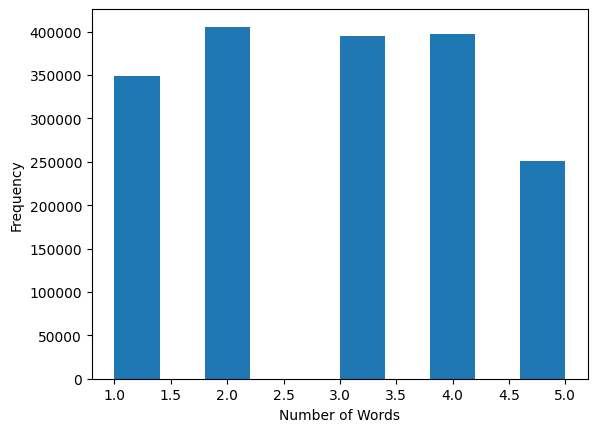

In [22]:

plt.hist(processed_tip_df['word_count'])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [23]:
processed_tip_df.drop(["word_count"],  axis=1, inplace=True )
processed_tip_df

,text
0,Avengers time with the ladies
1,They have lots of good
2,deserts and tasty cuban sandwiches
3,It's open even when
4,Very decent fried chicken
...,...
1797257,of
1797258,Great food and service
1797259,Love their Cubans
1797260,Great pizza great price


In [24]:
processed_tip_df.to_csv('smart_swiping_processed_tip_dataset.csv',index=False)

In [1]:
import json
import pandas as pd
data_file = open("/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json")
data = []
count = 0
for line in data_file:
    data.append(json.loads(line))
    count+=1
    if (count == 50 * 100 * 1000):
        break
review_df = pd.DataFrame(data)
data_file.close()

In [2]:
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
4999995,ylWAkYNyMUE89wZi3mfF_w,SCqdOpu99eB8si3O4VNGZw,RFsp1nH2fHVyAdTSMDWuNg,3.0,1,1,1,"I haven't eaten a lot of Thai food in Reno, ma...",2009-10-26 12:14:40
4999996,RFKsfcOutfhFM9V_K8FUUw,T9nDMe9mljDsAV7MvxcvOw,XC30E7D4gfIrLmh4d4prSw,4.0,0,0,0,Good food with generous portions. I had the ch...,2018-09-07 23:06:07
4999997,uuf4-lsOdDNGaxGX7kdKvQ,jh7CWRWIHNPR_n9GQn6Qww,SGi8AJhR8iS-LsQwcMOAVA,5.0,0,0,1,Beer. Lots and lots of beer.\nIf you can't fi...,2013-03-27 16:27:03
4999998,lHXmsAIvC8hfA0fl3qKlOQ,NIhcRW6DWvk1JQhDhXwgOQ,IWHdx0NhDKADkGOgXgOFKQ,5.0,9,4,5,I love a great sandwich and DiNic's shaved por...,2014-08-17 01:32:46


In [3]:
review_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [4]:
# review_df = review_df[["text"]]
array_to_drop = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'date']

review_df.drop(array_to_drop,  axis=1, inplace=True )

In [5]:
review_df.reset_index(drop=True, inplace=True) 
review_df

,text
0,"If you decide to eat here, just be aware it is..."
1,I've taken a lot of spin classes over the year...
2,Family diner. Had the buffet. Eclectic assortm...
3,"Wow! Yummy, different, delicious. Our favo..."
4,Cute interior and owner (?) gave us tour of up...
...,...
4999995,"I haven't eaten a lot of Thai food in Reno, ma..."
4999996,Good food with generous portions. I had the ch...
4999997,Beer. Lots and lots of beer.\nIf you can't fi...
4999998,I love a great sandwich and DiNic's shaved por...


In [6]:
review_df.to_csv('review_subset.csv',index=False)

In [7]:
import os

file_path = "/kaggle/working/review_subset.csv"
if os.path.exists(file_path):
    file_size = os.path.getsize(file_path)
    print(f"The file size of '{file_path}' is {file_size / (1024 ** 3 )} GB.")
else:
    print(f"The file '{file_path}' does not exist.")

The file size of '/kaggle/working/review_subset.csv' is 2.659739226102829 GB.


In [8]:
import pandas as pd
import numpy as np


In [9]:
review_subset_df = pd.read_csv(file_path,nrows=10 * 100 * 1000)

In [10]:
review_subset_df

,text
0,"If you decide to eat here, just be aware it is..."
1,I've taken a lot of spin classes over the year...
2,Family diner. Had the buffet. Eclectic assortm...
3,"Wow! Yummy, different, delicious. Our favo..."
4,Cute interior and owner (?) gave us tour of up...
...,...
999995,Never really had any issues here other than th...
999996,Fish recently moved a couple of doors down the...
999997,I've been to South House around a dozen or so ...
999998,Wow! I am shocked at these reviews. I have tri...


In [11]:
review_subset_df['word_count'] = review_subset_df['text'].str.split().apply(len)
review_subset_df['word_count']

0         101
1         151
2          55
3          40
4          94
         ... 
999995     28
999996    100
999997    555
999998     28
999999    442
Name: word_count, Length: 1000000, dtype: int64

In [12]:
review_subset_df.describe()

,word_count
count,1000000.000000
mean,103.947536
std,96.675272
min,1.000000
25%,42.000000
50%,74.000000
75%,132.000000
max,1027.000000


In [13]:
review_subset_df.word_count.sum()

103947536

In [14]:
def replaceAcceptedChars(text : str, replaceApostrophe = True):
    text = text.replace('.', ' ').replace(',', '')
    if replaceApostrophe:
        text = text.replace("'", '').replace("\"","")
    text = text.replace("!","")
    return text

def isValidText(text : str ):
    return replaceAcceptedChars(text).replace(" ","").isalpha()

In [15]:
review_subset_df.iloc[0,:]["text"]

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."

In [16]:
test_string = "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."
test_string

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."

In [17]:
test_string.split(".")

['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end',
 " We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience",
 ' \n\nThe food is good, but it takes a very long time to come out',
 ' The waitstaff is very young, but usually pleasant',
 ' We have just had too many experiences where we spent way too long waiting',
 ' We usually opt for another diner or restaurant on the weekends, in order to be done quicker',
 '']

In [18]:
import re
cleaned_string = re.sub(r'[^a-zA-Z0-9\s]', '', test_string)
cleaned_string

'If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it I have been to its other locations in NJ and never had a bad experience \n\nThe food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker'

In [19]:
isValid = replaceAcceptedChars(cleaned_string).replace(" ","").isalpha()
isValid



False

In [20]:
# Split by space

st_list = test_string.split(" ")
st_list = [x for x in st_list if x.strip()]

validText = []

for i in range(len(st_list) // 5):
    words = ""
    for j in range(i*5, (i*5) + 5):
        words+= " " + st_list[j]
    if (isValidText(words)):
        validText.append( replaceAcceptedChars(words, replaceApostrophe = False ).strip())
    else:
        print("Invalid" , words)
        
print("Valid Texts:")
print(validText)

Invalid  2 hours from beginning to
Invalid  a bad experience. 

The food
Valid Texts:
['If you decide to eat', 'here just be aware it', 'is going to take about', 'end  We have tried it', 'multiple times because I want', 'to like it I have', "been to it's other locations", 'in NJ and never had', 'is good but it takes', 'a very long time to', 'come out  The waitstaff is', 'very young but usually pleasant', 'We have just had too', 'many experiences where we spent', 'way too long waiting  We', 'usually opt for another diner', 'or restaurant on the weekends', 'in order to be done']


In [21]:
test_string = test_string + ". Heelo test."

In [22]:
import random
int((random.random()*5) + 1)

4

In [23]:
def getValidStrings(test : str, length : int):
    sentence_list = test.split(".")

    validText = []

    for string in sentence_list:
        st_list = string.split(" ")
        st_list = [x for x in st_list if x.strip()]
        
    


        for i in range(len(st_list) // length):
            words = ""
            for j in range(i*length, (i*length) + length):
                words+= " " + st_list[j]
            if (isValidText(words)):
                validText.append( replaceAcceptedChars(words, replaceApostrophe = False ).strip())

    return validText


In [24]:
getValidStrings(test_string,2 )

['If you',
 'decide to',
 'eat here',
 'just be',
 'aware it',
 'is going',
 'to take',
 'hours from',
 'beginning to',
 'We have',
 'tried it',
 'multiple times',
 'because I',
 'want to',
 'like it',
 'I have',
 'been to',
 "it's other",
 'locations in',
 'NJ and',
 'never had',
 'a bad',
 'is good',
 'but it',
 'takes a',
 'very long',
 'time to',
 'come out',
 'The waitstaff',
 'is very',
 'young but',
 'usually pleasant',
 'We have',
 'just had',
 'too many',
 'experiences where',
 'we spent',
 'way too',
 'long waiting',
 'We usually',
 'opt for',
 'another diner',
 'or restaurant',
 'on the',
 'weekends in',
 'order to',
 'be done',
 'Heelo test']

In [25]:
final_df = pd.DataFrame(columns=['text'])
final_df

,text


In [26]:
# data = []

# for index, row in review_subset_df.iterrows():
#     max_phrases = 10
#     count += 1
    
#     text = row["text"]
#     valid_texts = getValidStrings(text, length )
    
#     for text in valid_texts:
#         data.append([text])
#         count+=1
#         if (count > required_count):
#             break
    
#     if (count > required_count):
#         break

In [27]:
REQUIRED_COUNT_FOR_EACH_LENGTH = 10 * 100 * 1000 # 1 mil\
MAX_WORDS = 5



In [28]:
count = [0 for i in range (MAX_WORDS)]
count

[0, 0, 0, 0, 0]

In [29]:
import random

def getRandomStringLengthFromReqCount():
    req_count = []
    for i in range(MAX_WORDS):
        if (count[i] < REQUIRED_COUNT_FOR_EACH_LENGTH):
            req_count.append(i+1)
    
    if (len(req_count) == 0):
        return 0
    
    return random.choice(req_count)

In [30]:
random.randint(1, 6)

1

In [31]:
def getRandomValidStrings(test : str, dontCutSmallSentences = False, useReqCountForRandom = True):
    sentence_list = test.split(".")

    validText = []

    for string in sentence_list:
        st_list = string.split(" ")
        st_list = [x for x in st_list if x.strip()]
        
        if (len(st_list) == 0):
            continue
    
        
        if (len(st_list) < MAX_WORDS):
            words = ""
           
            if not (dontCutSmallSentences):
            
                length =   random.randint(1,len(st_list))
                start = random.randint(0, len(st_list) - length)
                end = start + length

            
                for j in range( start, end):
                    words+= " " + st_list[j]
            else:
                for i in st_list:
                    words+= " " + i
                
            if (isValidText(words) and len(words) != 0):
                validText.append( replaceAcceptedChars(words, replaceApostrophe = False).strip())


        for i in range(len(st_list) // MAX_WORDS):
            words = ""
            
            length =  random.randint(1,MAX_WORDS) if not (useReqCountForRandom) else  getRandomStringLengthFromReqCount()
            start = random.randint(0, MAX_WORDS - length)
            end = start + length

            
            for j in range((i*MAX_WORDS) + start, (i*MAX_WORDS) + end):
                words+= " " + st_list[j]
                
            if (isValidText(words) and len(words) != 0):
                validText.append( replaceAcceptedChars(words, replaceApostrophe = False).strip())

    return validText



In [32]:
getRandomValidStrings("Hello Everyone. This is a long sentence. Hope this works really well!. They're It's", True)

['Hello Everyone', 'This is a long', 'Hope this works really', "They're It's"]

In [33]:
getRandomValidStrings("Hello Everyone. This is a long sentence. Hope this works really well!. They're It's", True)

['Hello Everyone', 'This is a', 'Hope this works really', "They're It's"]

In [34]:
words = getRandomValidStrings(test_string)
temp_count = [0 for i in range(MAX_WORDS)]

for i in words:
    temp_count[len(i.split(" ")) - 1]+=1
    
    
print(temp_count)

[5, 3, 2, 3, 3]


In [35]:
def canContinue():
    for i in count:
        if (i < REQUIRED_COUNT_FOR_EACH_LENGTH):
            return True
    return False

In [37]:
review_subset_data = []
count = [0 for i in range (MAX_WORDS)]

index_count = 0
for index, row in review_subset_df.iterrows():
    
    index_count+=1;
    if (index_count % (10 * 1000) == 0 ):
        print("Total rows processed : ", index_count)
    
    text = row["text"]
    valid_texts = getRandomValidStrings(text )
    
    for text in valid_texts:
        len_WORDS = len(text.split(" "))
        count[len_WORDS - 1]+=1
        review_subset_data.append([text])

#     if (not canContinue()):
#         print("Generated Data", count)
#         break
print("Generated Data : ", count)

Total rows processed :  10000
Total rows processed :  20000
Total rows processed :  30000
Total rows processed :  40000
Total rows processed :  50000
Total rows processed :  60000
Total rows processed :  70000
Total rows processed :  80000
Total rows processed :  90000
Total rows processed :  100000
Total rows processed :  110000
Total rows processed :  120000
Total rows processed :  130000
Total rows processed :  140000
Total rows processed :  150000
Total rows processed :  160000
Total rows processed :  170000
Total rows processed :  180000
Total rows processed :  190000
Total rows processed :  200000
Total rows processed :  210000
Total rows processed :  220000
Total rows processed :  230000
Total rows processed :  240000
Total rows processed :  250000
Total rows processed :  260000
Total rows processed :  270000
Total rows processed :  280000
Total rows processed :  290000
Total rows processed :  300000
Total rows processed :  310000
Total rows processed :  320000
Total rows proces

In [38]:
processed_review_subset_df = pd.DataFrame(review_subset_data, columns=['text'])
processed_review_subset_df

,text
0,If you decide to eat
1,here just be
2,going
3,it
4,want
...,...
5494023,broth is great
5494024,worth
5494025,keep going back
5494026,sorry


In [39]:
processed_review_subset_df['word_count'] = processed_review_subset_df['text'].str.split().apply(len)
processed_review_subset_df

,text,word_count
0,If you decide to eat,5
1,here just be,3
2,going,1
3,it,1
4,want,1
...,...,...
5494023,broth is great,3
5494024,worth,1
5494025,keep going back,3
5494026,sorry,1


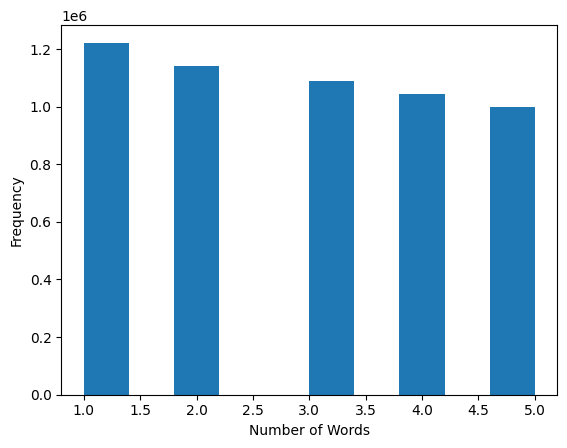

In [43]:
import matplotlib.pyplot as plt

plt.hist(processed_review_subset_df['word_count'])
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [44]:
processed_review_subset_df.drop(["word_count"],  axis=1, inplace=True )
processed_review_subset_df

,text
0,If you decide to eat
1,here just be
2,going
3,it
4,want
...,...
5494023,broth is great
5494024,worth
5494025,keep going back
5494026,sorry


In [45]:
processed_review_subset_df.to_csv('smart_swiping_review_subset_dataset.csv',index=False)